In [1]:
#!git clone https://github.com/rcpsilva/TimeSeriesForecastingWindSun

In [2]:
#!pip install pyramid-arima

In [3]:
#!pip install statsmodels==0.12.0rc0

In [4]:
#!pip install chart-studio

In [5]:
import pandas as pd
import numpy as np
from datetime import timedelta
import statsmodels.api as sm

## Get data

In [6]:
#obtem os dados
url1 = 'https://raw.githubusercontent.com/lrssv/TimeSeriesForecastingWindSun/master/series_ventovel_pampulha_2018_2019'
url2 = 'https://raw.githubusercontent.com/lrssv/TimeSeriesForecastingWindSun/master/series_radiacao_pampulha_2018_2019'

df_ventovel = pd.read_csv(url1, header=0, parse_dates=[0], index_col=0, squeeze=True)
df_radiacao = pd.read_csv(url2, header=0, parse_dates=[0], index_col=0, squeeze=True)

series_ventovel = pd.Series(df_ventovel)
series_radiacao = pd.Series(df_radiacao)

In [7]:
series_radiacao.head

<bound method NDFrame.head of 2018-01-01 00:00:00       0.0
2018-01-01 01:00:00       0.0
2018-01-01 02:00:00       0.0
2018-01-01 03:00:00       0.0
2018-01-01 04:00:00       0.0
                        ...  
2019-12-31 19:00:00    1747.2
2019-12-31 20:00:00     577.5
2019-12-31 21:00:00     655.5
2019-12-31 22:00:00      44.0
2019-12-31 23:00:00       0.0
Name: 0, Length: 17520, dtype: float64>

## Visualize data

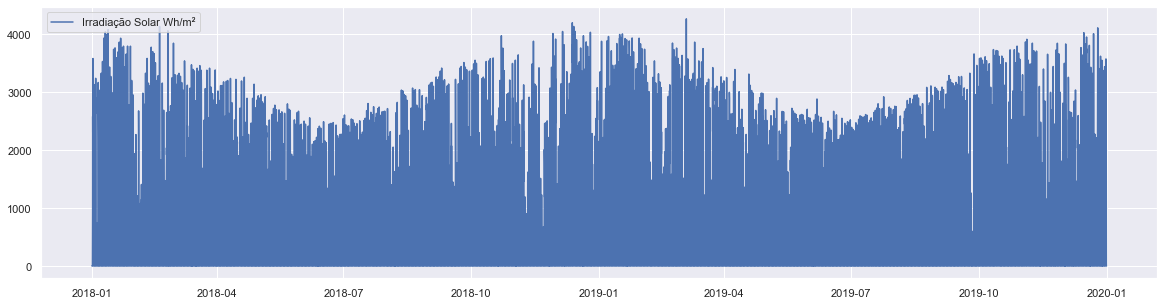

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

fig = plt.figure(figsize=(20,5))
plt.plot(series_radiacao)
plt.legend(['Irradiação Solar Wh/m²'], ncol=2, loc='upper left')

(array([10584.,  1143.,   981.,  1033.,   984.,  1109.,   824.,   543.,
          263.,    56.]),
 array([   0.  ,  426.83,  853.66, 1280.49, 1707.32, 2134.15, 2560.98,
        2987.81, 3414.64, 3841.47, 4268.3 ]),
 <a list of 10 Patch objects>)

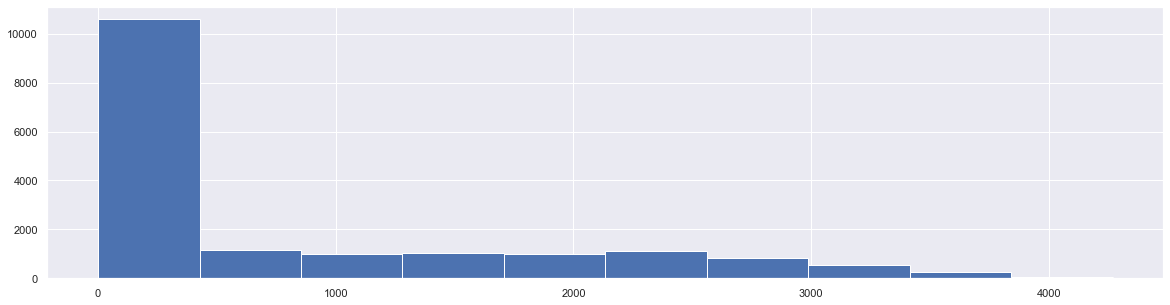

In [11]:
plt.figure(figsize=(20,5))
plt.hist(series_radiacao)

### Auto-correlation - No transformation

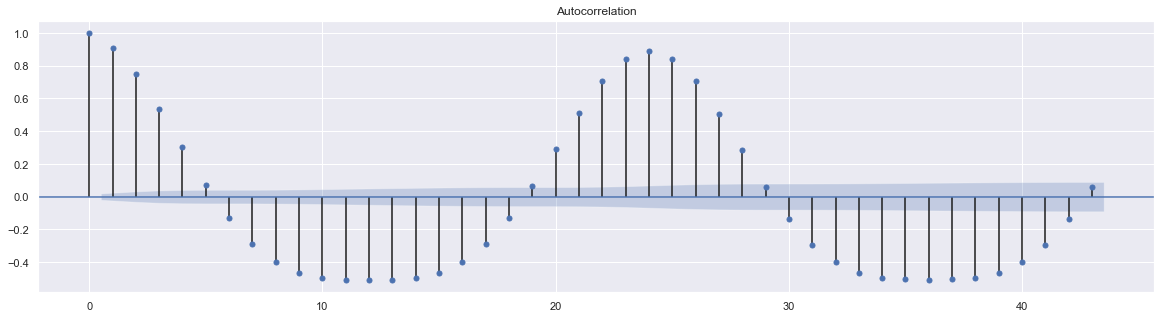

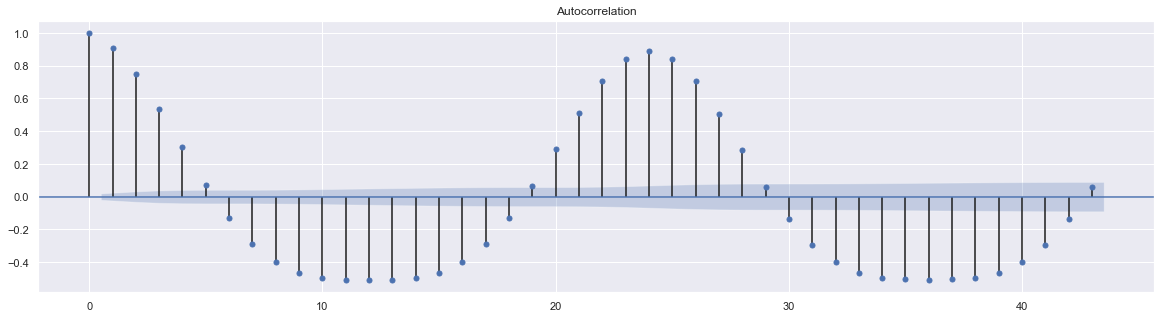

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
fig,ax =  plt.subplots(figsize=(20,5))
plot_acf(series_radiacao,ax = ax, alpha=0.01)

### Auto-correlation differentiation

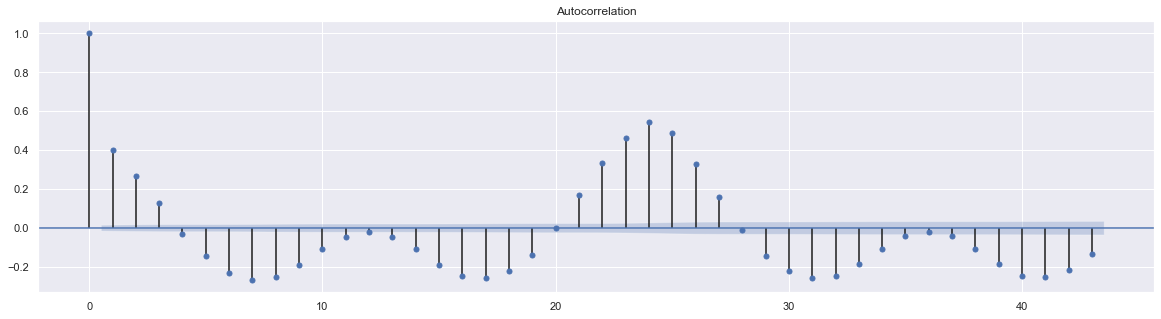

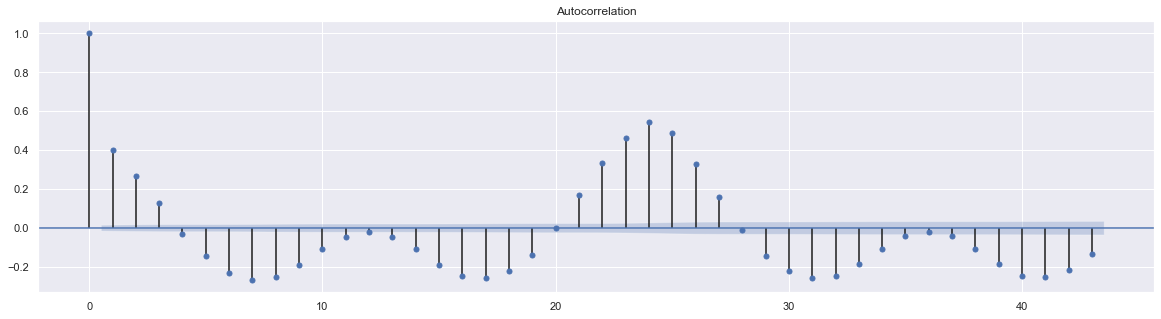

In [13]:
from statsmodels.tsa.statespace.tools import diff

fig, ax = plt.subplots(figsize=(20,5))
plot_acf(diff(series_radiacao,1),ax=ax)


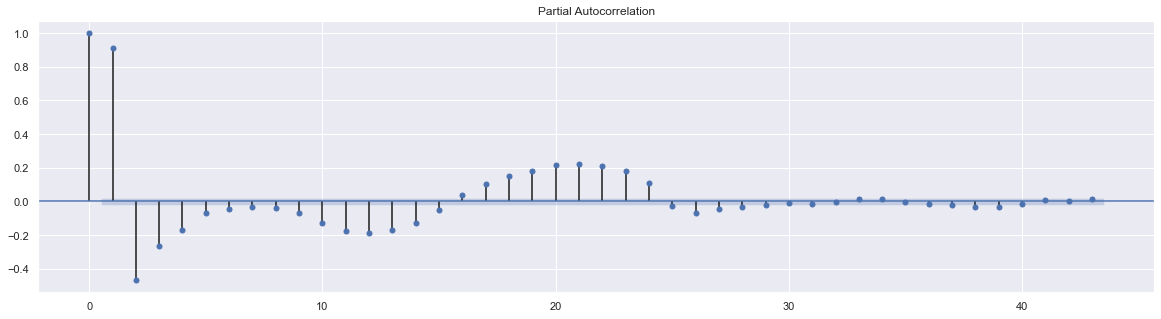

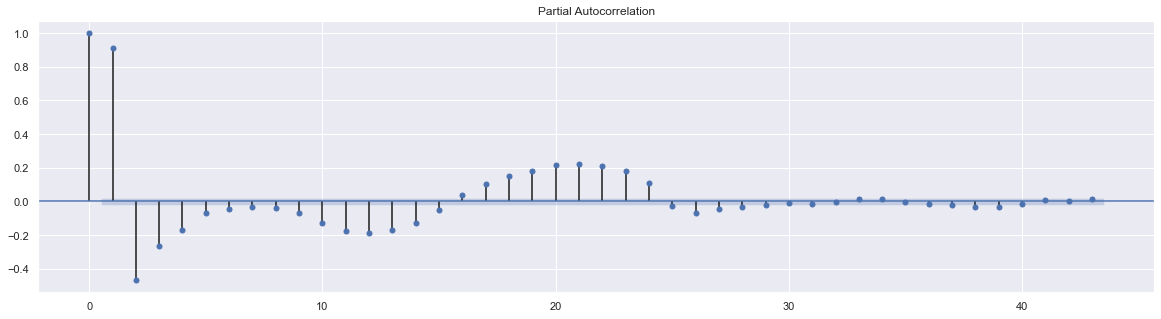

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax =  plt.subplots(figsize=(20,5))
plot_pacf(series_radiacao,ax = ax, alpha=0.01)

# Fit ARIMA

In [15]:
train = series_radiacao.loc['2018-01-01 01:00:00':'2019-12-25 01:00:00']
test = series_radiacao.loc['2019-12-25 01:00:00':] 

### Auto ARIMA Set-up

# Fit ARIMA

In [16]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time

In [17]:
print(sm.__version__)

0.12.0rc0


## Test ARIMA

In [18]:
def test_model(train,test,steps_ahead,order):
  temp_train = train.copy()
  results = []
  
  arima = SARIMAX(temp_train, order=order)
  model = arima.fit(disp=False)
  
  results.append(model.forecast(steps_ahead))
  for i in range(test.shape[0]):
    # Apend t to train
    temp_train = temp_train.append(test[i:i+1])
    
    # Apply model
    arima = SARIMAX(temp_train, order=order)
    model = arima.fit(disp=False)

    # Teste model
    results.append(model.forecast(steps_ahead))

  results_series = test.copy()
  for i in range(results_series.shape[0]):
    results_series[i] = max(results[i],0) 
  
  return results_series


In [19]:
order_autoarima = (4,0,2)
order_acf = (5,0,4)

In [20]:
# One hour ahead
forecasts_auto_arima = test_model(train,test,1,order_autoarima)
forecasts_auto_arima.to_csv('forecasts_auto_arima.csv',header=False)

s
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Usuario\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Usuario\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Usuario\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users

KeyboardInterrupt: 

In [ ]:
forecasts_acf_arima = test_model(train,test,1,order_acf)
forecasts_acf_arima.to_csv('forecasts_acf_arima.csv',header=False)